# Desafio I

 - criar um gráfico de linhas comparando os números de imigrantes do Brasil e Argentina para o Canadá, que são os maiores países da América do Sul.

## Responder as questoes abaixo
 - Há alguma tendência ou padrão comum nos dados dos dois países?
 - Quais são os períodos com maior número de imigrantes nos dois países?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

dados = pd.read_csv(r'C:\Users\PC\Desktop\Projetos\Python\02. Avançando em Data Science\01. Data Visualization criando graficos com bibliotecas Python\bases\imigrantes_canada.csv')

dados.head()

,País,Continente,Região,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Argélia,África,Norte da África,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [82]:
# transformar pais em index
dados.set_index('País', inplace=True)

In [27]:
# selecionar dados apenas dos anos
anos = dados.filter(regex='\d+',).columns.tolist()

# selecionar colunas do brasil e argentina
paises = dados.loc[['Brasil', 'Argentina'], anos]
# transpor linhas e colunas
paises = paises.T



<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\PC\AppData\Local\Temp\ipykernel_13220\3085221623.py:2: SyntaxWarning: invalid escape sequence '\d'
  anos = dados.filter(regex='\d+',).columns.tolist()


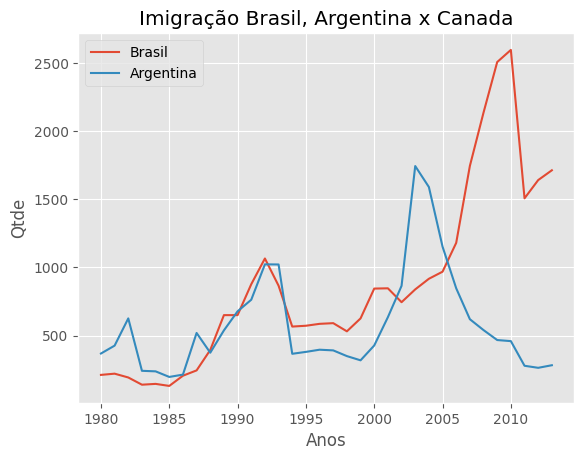

In [ ]:
# plotar grafico

# colocar um estilo de grafico
plt.style.use('ggplot')

plt.plot(paises['Brasil'], label = 'Brasil')
plt.plot(paises['Argentina'], label = 'Argentina')

plt.title('Imigração Brasil, Argentina x Canada')
plt.xlabel('Anos')
plt.ylabel('Qtde')

plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010'])

# colocar a legenda das linhas
plt.legend()
# colocar um grid para mudar o fundo
plt.grid(color='white') 

plt.show()

# Desafio II

Você trabalha como Analista de Dados em uma empresa de varejo e recebeu a tarefa de criar uma figura com subplots que apresente a variação no número de vendas em quatro diferentes lojas ao longo de um ano. A gerência da empresa precisa visualizar de forma clara as tendências de vendas em cada loja, para que possam tomar decisões estratégicas sobre os estoques e ações de marketing. Para isso, você deve criar quatro subplots dispostos em duas linhas e duas colunas, onde cada subplot representa uma loja diferente. Nesse desafio, cada subplot deve apresentar um gráfico de linhas que mostre a variação do número de vendas ao longo dos meses do ano.

Agora, chegou a hora de mostrar suas habilidades em análise de dados e visualização! Para criar o DataFrame com o número de vendas das lojas e criar a figura, utilize as informações abaixo:

In [10]:
lojas = ['A', 'B', 'C', 'D']

vendas_2022 = {'Jan': [100, 80, 150, 50],
    'Fev': [120, 90, 170, 60],
    'Mar': [150, 100, 200, 80],
    'Abr': [180, 110, 230, 90],
    'Mai': [220, 190, 350, 200],
    'Jun': [230, 150, 280, 120],
    'Jul': [250, 170, 300, 140],
    'Ago': [260, 180, 310, 150],
    'Set': [240, 160, 290, 130],
    'Out': [220, 140, 270, 110],
    'Nov': [400, 220, 350, 190],
    'Dez': [300, 350, 400, 250]
}

# Dica: Para facilitar a criação dos subplots, você pode definir a coluna "Lojas" como índice do DataFrame e utilizar a propriedade loc da biblioteca Pandas para plotar cada uma das lojas.
# Não se esqueça de adicionar um título geral à figura, títulos aos subplots e rótulos aos eixos. Além disso, se atente ao tamanho da figura e ao espaçamento entre os subplots!

,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
A,-100,120,150,180,220,230,250,260,240,220,400,300
B,80,90,100,110,190,150,170,180,160,140,220,350
C,150,170,200,230,350,280,300,310,290,270,350,400
D,50,60,80,90,200,120,140,150,130,110,190,250


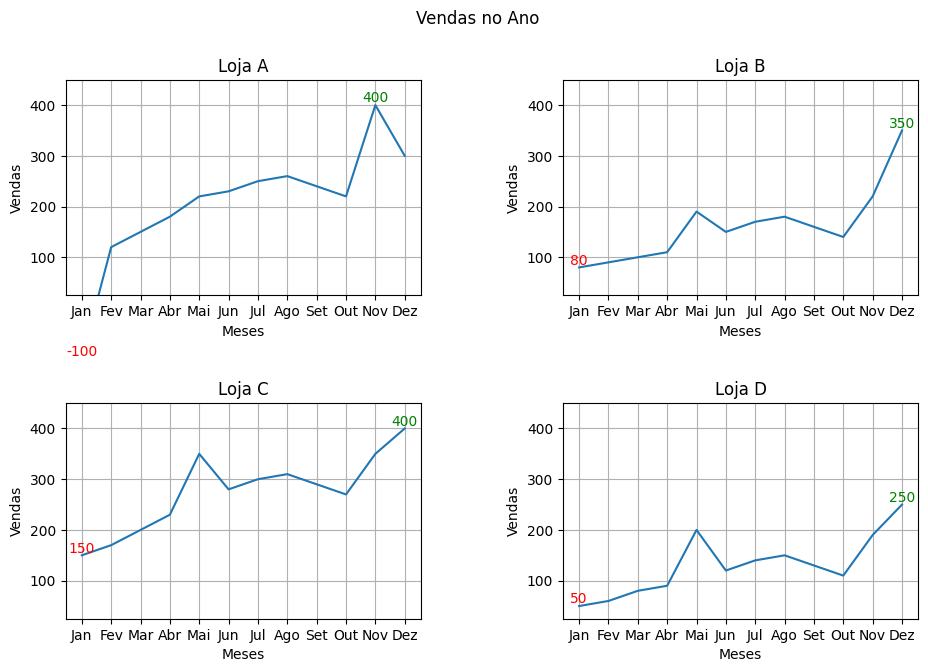

In [8]:
# transformar os dados em DataFrame
df = pd.DataFrame(vendas_2022, index= lojas)

# definir a quantidade de figuras e eixos e tamanho
fig, axs = plt.subplots(2,2, figsize = (11,7))
# alterar espacamento
fig.subplots_adjust(hspace=0.5, wspace=0.4)


# alterar nome geral do grafico
fig.suptitle('Vendas no Ano')

# plotar graficos
axs[0,0].plot(df.loc['A', :])
axs[0,0].set_title('Loja A')

axs[0,1].plot(df.loc['B', :])
axs[0,1].set_title('Loja B')

axs[1,0].plot(df.loc['C', :])
axs[1,0].set_title('Loja C')

axs[1,1].plot(df.loc['D', :])
axs[1,1].set_title('Loja D')

# incluir rotulos
for ax in axs.flat:
    ax.set_xlabel('Meses')
    ax.set_ylabel('Vendas')
    ax.grid()

# alterar escalas
ymin = 25
ymax = 450

for ax in axs.ravel():
    ax.set_ylim(ymin, ymax)

# exibindo valores minimos e maximos 
for ax, loja in zip(axs.flat, ['A', 'B', 'C', 'D']):
    y_min = df.loc[loja].min()
    y_max = df.loc[loja].max()
    x_min = df.loc[loja].idxmin()
    x_max = df.loc[loja].idxmax()

    ax.text(x_min, y_min, f'{y_min}', fontsize=10, color='red', ha='center', va='bottom')
    ax.text(x_max, y_max, f'{y_max}', fontsize=10, color='green', ha='center', va='bottom')

plt.show()





# Desafio III

 - Alterar a posição dos títulos dos subplots para esquerda.
 - Aumentar o tamanho da fonte do título geral da figura para destacá-lo.
 - Aumentar o tamanho dos títulos e rótulos dos eixos dos subplots.
 - Deixar as linhas com a espessura maior.
 - Alterar a cor das linhas de cada loja para diferenciá-las ainda mais.

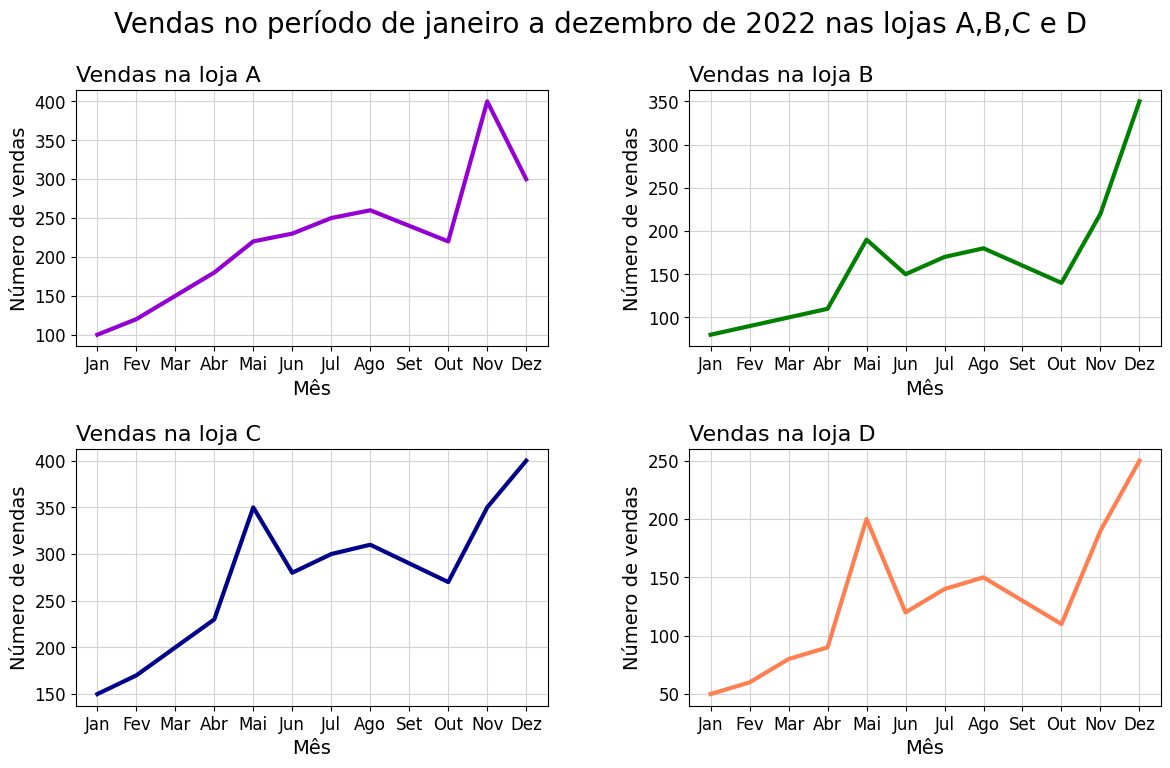

In [63]:
# Criar a figura e os subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 8))

# Ajustar os espaçamentos entre os subplots
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# Adicionando um título geral para os subplots
fig.suptitle('Vendas no período de janeiro a dezembro de 2022 nas lojas A,B,C e D', fontsize=20)

# Lista de cores
cores = ['darkviolet', 'green', 'darkblue', 'coral']

#Loop para plotar e customizar os subplots
for i, ax in enumerate(axs.flat):
    ax.plot(df.loc[df.index[i]], color=cores[i], lw=3)
    ax.set_title(f'Vendas na loja {df.index[i]}', loc='left', fontsize=16)
    ax.set_xlabel('Mês', fontsize=14)
    ax.set_ylabel('Número de vendas', fontsize=14)
    ax.tick_params(labelsize=12)
    ax.grid(color='lightgrey')

# Desafio Iv

Nesta etapa, seu desafio é criar uma figura contendo as tendências de imigração dos 4 maiores países da América latina: Brasil, Argentina, Peru e Colômbia. 
Através dessa criação você pode explorar diversas possibilidades e reconhecer de forma atrativa o seu processo de desenvolvimento.E não nos esqueçamos das orientações! 
Essa figura precisa ter uma linha para cada país, título, rótulos nos eixos, cores apropriadas, um tema da biblioteca Seaborn e legenda.
Por isso, pense nas questões de acessibilidade, como tamanho das fontes e espessura das linhas. É importante escolher cores adequadas que não causem cansaço visual ou dificultem a leitura das informações. Além disso, o tamanho das fontes deve ser legível o suficiente para que as pessoas possam interpretar os dados com facilidade.

Dica: para escolher a paleta de cores, você também pode consultar a documentação da biblioteca Matploltib. A Seaborn utiliza as colormaps do Matplotlib por padrão, além de oferecer suas próprias paletas de cores. Para aplicar uma paleta de cores a todas as linhas da figura você pode usar a função sns.set_palette() e passar a ela o nome da paleta escolhida.

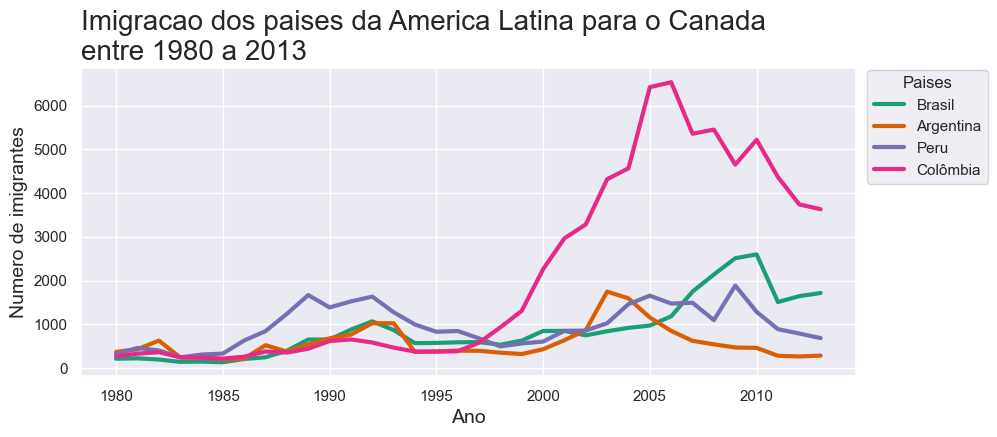

In [88]:
import seaborn as sns
anos = list(map(str, range(1980,2014)))

sns.set_theme()
sns.set_palette('Dark2')

fig, ax = plt.subplots(figsize=(10,4))

ax = sns.lineplot(dados.loc['Brasil', anos], label = 'Brasil', lw=3)
ax = sns.lineplot(dados.loc['Argentina', anos], label = 'Argentina', lw=3)
ax = sns.lineplot(dados.loc['Peru', anos], label = 'Peru', lw=3)
ax = sns.lineplot(dados.loc['Colômbia', anos], label = 'Colômbia', lw=3)

ax.set_title('Imigracao dos paises da America Latina para o Canada\nentre 1980 a 2013', loc='left', fontsize=20)
ax.set_xlabel('Ano', fontsize =14)
ax.set_ylabel('Numero de imigrantes', fontsize = 14)

ax.xaxis.set_major_locator(plt.MultipleLocator(5))

ax.legend(title = 'Paises', loc='upper right', bbox_to_anchor= (1.18,1.02))

plt.show()



# Desafio V

 - Sua tarefa é criar um gráfico animado com o Plotly que mostre esses dados. O gráfico deve ter as seguintes características:
     - Duas linhas: uma para o Brasil e outra para a Argentina.
     - Um botão "Play" para iniciar a animação, mostrando o aumento ou diminuição do número de imigrantes ao longo dos anos.
     - As configurações de animação devem fazer com que as duas linhas sejam exibidas e animadas ao mesmo tempo.

 - Dicas:
    - Crie um DataFrame com os dados da Argentina e não se esqueça de deixar a coluna de anos no tipo int(inteiro).
    - Use o código fornecido para o Brasil como base e adapte-o para incluir os dados da Argentina.
    - Para configurar as animações você pode fazer um Loop for para percorrer o DataFrame dados_brasil e para cada iteração, criar uma nova lista contendo dois objetos do tipo go.Scatter, um para cada país. Em seguida, cada lista pode ser usada para criar um objeto go.Frame, que é adicionado à lista de frames. Por fim, a lista de frames pode ser atribuída ao objeto fig, que é a figura do gráfico a ser animado. Com isso, quando a animação for iniciada, o gráfico exibirá as duas linhas em movimento, uma para o Brasil e outra para a Argentina.     

In [ ]:
import plotly.graph_objs as go

fig = go.Figure()

dados_brasil['ano'] = dados_brasil['ano'].astype(int)
dados_argentina['ano'] = dados_argentina['ano'].astype(int)

fig = go.Figure()

fig.add_trace(
    go.Scatter(x=[dados_brasil['ano'].iloc[0]], y=[dados_brasil['imigrantes'].iloc[0]], mode='lines', name='Imigrantes - Brasil', line=dict(width=4))
)
fig.add_trace(
    go.Scatter(x=[dados_argentina['ano'].iloc[0]], y=[dados_argentina['imigrantes'].iloc[0]], mode='lines', name='Imigrantes - Argentina', line=dict(width=5))
)

fig.update_layout(
    title=dict(
        text='<b>Imigração do Brasil e Argentina para o Canadá no período de 1980 a 2010</b>',
        x=0.12,
        xanchor='left',
        font=dict(size=20)
    ),
    xaxis=dict(range=[1980, 2013], autorange=False, title='<b>Ano</b>'),
    yaxis=dict(range=[0, 3000], autorange=False, title='<b>Número de imigrantes</b>'),
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        buttons=[dict(
            label='Play',
            method='animate',
            args=[None, {'frame': {'duration': 100, 'redraw': True}, 'fromcurrent': True}]
        )]
    )],
    width=1200, 
    height=600 
)

frames = []
for i in range(len(dados_brasil)):
    frame_data = [
        go.Scatter(x=dados_brasil['ano'].iloc[:i+1], y=dados_brasil['imigrantes'].iloc[:i+1]),
        go.Scatter(x=dados_argentina['ano'].iloc[:i+1], y=dados_argentina['imigrantes'].iloc[:i+1])
    ]
    frame = go.Frame(data=frame_data)
    frames.append(frame)
fig.frames = frames

fig.write_html('imigracao_argenina|_brasil.html')
fig.show()